In [82]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm

In [83]:
# For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

# It's time to put it all together. Remember the previous rounds and follow the steps as shown in previous lectures.

# 01 - Problem (case study)
    # Data Description.
    # Goal.
    
# 02 - Getting Data
    # Read the .csv file.
    
# 03 - Cleaning/Wrangling/EDA
    # Change headers names.
    # Deal with NaN values.
    # Categorical Features.
    # Numerical Features.
    # Exploration.
    
# 04 - Processing Data
    # Dealing with outliers.
    # Normalization.
    # Encoding Categorical Data.
    # Splitting into train set and test set.
    
# 05 - Modeling
    # Apply model.
    
# 06 - Model Validation
    # R2.
    # MSE.
    # RMSE.
    # MAE.
    
# 07 - Reporting
    # Present results.

In [84]:
# Define constants that will be used during processing:

LAB2_CSV_FILE = 'marketing_customer_analysis.csv'
NEW_COLUMNS = ['customer', 'state', 'customer_lifetime_value',
       'response', 'coverage', 'education', 'effective_to_date',
       'employment_status', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'vehicle_type']
PERCENTAGE_NAN = 50
Y_VAR = 'total_claim_amount'
THRESHOLD = 3
COLS_TO_LOG = ['customer_lifetime_value', 'income', 'monthly_premium_auto']
COLS_TO_TRANSFORM = ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception']
TEST_SIZE = 0.4
RANDOM_STATE = 100
CATEGORICAL_CSV_FILE = 'categorical_from_lab4.csv'
NUMERICAL_CSV_FILE = 'df_numeric_x_lab5.csv'
Y_CSV_FILE = 'df_y_lab5.csv'
ONE_HOT_COLS = ['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employment_status', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size']
LABEL_ENCODER_COLS = ['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employment_status', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size']
# TEST_SIZE = 0.4
# RANDOM_STATE = 100

In [85]:
# Define the functions that will be used during processing


# 02 - Getting Data
    # Read the .csv file.

def import_to_df(csv_file):
    df = pd.read_csv(csv_file)
    df = df.drop(['Unnamed: 0'], axis = 1)
    return df

# 03 - Cleaning/Wrangling/EDA
    # Change headers names.
    
def rename_columns(df, new_columns):
    df_copy = df.copy()
    df_copy.columns = new_columns
    return df_copy   
    
    # Deal with NaN values.
    
def check_nan_values(df):
    null_df = df.isna().sum()/len(df)*100
    print('The percentage of NaN values per column is:\n',null_df)
    
def remove_nan_cols(df, percentage_nan):
    df_copy = df.copy()
    null_df = df.isna().sum()/len(df)*100
    for item in null_df.index:
        if null_df.loc[item] > percentage_nan:
            df_copy.drop([item], inplace=True, axis=1)
            print("Dropping column:", item, "due to percentage of NaN values greater than:", percentage_nan) 
    return df_copy  

def remove_nan_rows(df):
    df_copy = df.copy()
    return df_copy.dropna()

# 03 - Cleaning/Wrangling/EDA
    # Outliers???
# def filter_outliers(df, threshold):
#     mask = pd.Series(data=True, index=df.index)
#     for col in df.columns:
#         q1 = df[col].quantile(0.25)
#         q3 = df[col].quantile(0.75)
#         iqr = q3 - q1
#         lower_limit = q1 - (threshold * iqr)
#         upper_limit = q3 + (threshold * iqr)
#         col_mask = (df[col] >= lower_limit) & (df[col] <= upper_limit)
#         mask = mask & col_mask
#     return df[mask]
    
    # Categorical Features. Numerical Features.
    
def to_object(df, col1, col2):
    df[col1] = df[col1].astype(str)
    df[col2] = df[col2].astype(str)
    return df   
    
def split_categorical_numerical(df):
    categorical_df = df.select_dtypes(include=['object'])
    numerical_df = df.select_dtypes(exclude=['object'])
    return categorical_df, numerical_df
    
    # Exploration.
        
# 04 - Processing Data
    # Dealing with outliers.
    # Normalization.
    
def split_numerical(numerical_df, y_var):
    df_copy = numerical_df.copy()
    x = df_copy.drop(y_var, axis=1)
    y = df_copy[y_var]
    return x,y

def plot_hist(df):
    num_cols = len(df.columns)
    num_subplots = num_cols // 2 + num_cols % 2
    fig, axis = plt.subplots(2,num_subplots, figsize=(12,8))  
    axis = axis.ravel()
    for i, col in enumerate(df.columns):
        sns.histplot(df[col], kde=True, ax = axis[i]).set_xlabel(col)     
    plt.tight_layout()
    plt.show()
    
def plot_box(df):
    num_cols = len(df.columns)
    num_subplots = num_cols // 2 + num_cols % 2
    fig, axis = plt.subplots(2,num_subplots, figsize=(12,8))  
    axis = axis.ravel()
    for i, col in enumerate(df.columns):
        sns.boxplot(x = df[col], ax = axis[i]).set_xlabel(col)     
    plt.tight_layout()
    plt.show() 
    
def replace_inf(i):
    if np.isfinite(i):
        return i
    else:
        return np.NAN    
    
def log_transformer(df, cols_to_log):
    df_copy = df.copy()
    for col in cols_to_log:
        df_copy[col] = np.log(df_copy[col])
        df_copy[col] = list(map(replace_inf, df_copy[col]))
        df_copy[col] = df_copy[col].fillna(df_copy[col].mean())
    return df_copy

def box_cox_transformer(df, cols_to_transform):
    df_copy = df.copy()
    for col in cols_to_transform:
        df_copy[col] = np.where(df_copy[col] <= 0, 0, df_copy[col])
        df_copy[col].replace(0,df[col].mean(), inplace=True)
        transformed_col, _ = stats.boxcox(df_copy[col])
        df_copy[col] = transformed_col
    return df_copy

def min_max_scaler(df):
    df_copy = pd.DataFrame(MinMaxScaler().fit(df).transform(df))
    return df_copy

def standard_scaler(df):
    columns = df.columns
    df_copy = pd.DataFrame(StandardScaler().fit(df).transform(df))
    df_copy.columns = columns
    return df_copy

    # Encoding Categorical Data.
    # Splitting into train set and test set.    
    

def label_encoder(df, label_encoder_cols):
    df_copy = df.copy()
    for col in label_encoder_cols:
        df_copy[col] = LabelEncoder().fit(df_copy[col]).transform(df_copy[col])
    return df_copy

def one_hot_encoder(df, one_hot_cols):
    df_encoded = df.copy()
    encoder = OneHotEncoder()
    encoder.fit(df_encoded[one_hot_cols].values)
    encoded = encoder.transform(df_encoded[one_hot_cols].values)
    encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out(one_hot_cols))
    df_encoded = pd.concat([df_encoded, encoded_df], axis=1)
    df_encoded = df_encoded.drop(one_hot_cols, axis=1)
    return df_encoded       
        
def concat_df(df1, df2):
    df2 = df2.reset_index(drop=True)
    df_combined = pd.concat([df1, df2], axis=1, ignore_index=True)
    df_combined = sm.add_constant(df_combined)
    return df_combined

# def train_test_split(X, y, test_size=0.4, random_state=50):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=random_state)
#     return X_train, y_train, X_test, y_test

def linear_regression(X, y):
    X = sm.add_constant(X) # Add a constant tern to the input data
    model = sm.OLS(y, X).fit()
    return model
                   
def model_metrics(X, y, model):
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    print('R2 Score: {:.3f}'.format(r2), '\nMean Squared Error: {:.3f}'.format(mse), '\nRoot MSE: {:.3f}'.format(rmse), '\nMean Absolute Error: {:.3f}'.format(mae) )

In [86]:
# 01 - Problem (case study)
    # Data Description.
    # Goal: use predictive analytics to analyze the most profitable customers and how to interact.

# Lab 2

In [87]:
# 02 - Getting Data

df = import_to_df(LAB2_CSV_FILE)
df.shape

(10910, 25)

In [88]:
# 03 - Cleaning/Wrangling/EDA
    # Change headers names.
df = rename_columns(df, NEW_COLUMNS)
df.shape

(10910, 25)

In [89]:
# 03 - Cleaning/Wrangling/EDA:   
    # Deal with NaN values:
check_nan_values(df)

The percentage of NaN values per column is:
 customer                          0.000000
state                             5.783685
customer_lifetime_value           0.000000
response                          5.783685
coverage                          0.000000
education                         0.000000
effective_to_date                 0.000000
employment_status                 0.000000
gender                            0.000000
income                            0.000000
location_code                     0.000000
marital_status                    0.000000
monthly_premium_auto              0.000000
months_since_last_claim           5.802016
months_since_policy_inception     0.000000
number_of_open_complaints         5.802016
number_of_policies                0.000000
policy_type                       0.000000
policy                            0.000000
renew_offer_type                  0.000000
sales_channel                     0.000000
total_claim_amount                0.000000
vehicle_c

In [90]:
df = remove_nan_cols(df, PERCENTAGE_NAN)

Dropping column: vehicle_type due to percentage of NaN values greater than: 50


In [91]:
df = remove_nan_rows(df)
df.shape

(9134, 24)

In [92]:
check_nan_values(df)

The percentage of NaN values per column is:
 customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employment_status                0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64


In [93]:
#03 - Cleaning/Wrangling/EDA:
    # Split Categorical Numerical Features.
# df['effective_to_date'] = pd.to_datetime(df['effective_to_date'], errors='coerce')
df = to_object(df,'number_of_open_complaints', 'number_of_policies') 
df.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employment_status                 object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints         object
number_of_policies                object
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [94]:
categorical_df, numerical_df = split_categorical_numerical(df)
categorical_df.shape

(9134, 18)

In [95]:
#03 - Cleaning/Wrangling/EDA:
    # Exploration
categorical_df.describe().T


,count,unique,top,freq
customer,9134,9134,DK49336,1
state,9134,5,California,3150
response,9134,2,No,7826
coverage,9134,3,Basic,5568
education,9134,5,Bachelor,2748
effective_to_date,9134,59,1/10/11,195
employment_status,9134,5,Employed,5698
gender,9134,2,F,4658
location_code,9134,3,Suburban,5779
marital_status,9134,3,Married,5298


In [96]:
numerical_df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [97]:
numerical_df.shape

(9134, 6)

# Lab 5

In [98]:
# 04 - Processing Data
    # Dealing with outliers.
    # Normalization.
x, y = split_numerical(numerical_df, Y_VAR)
y.shape
x.shape

(9134, 5)

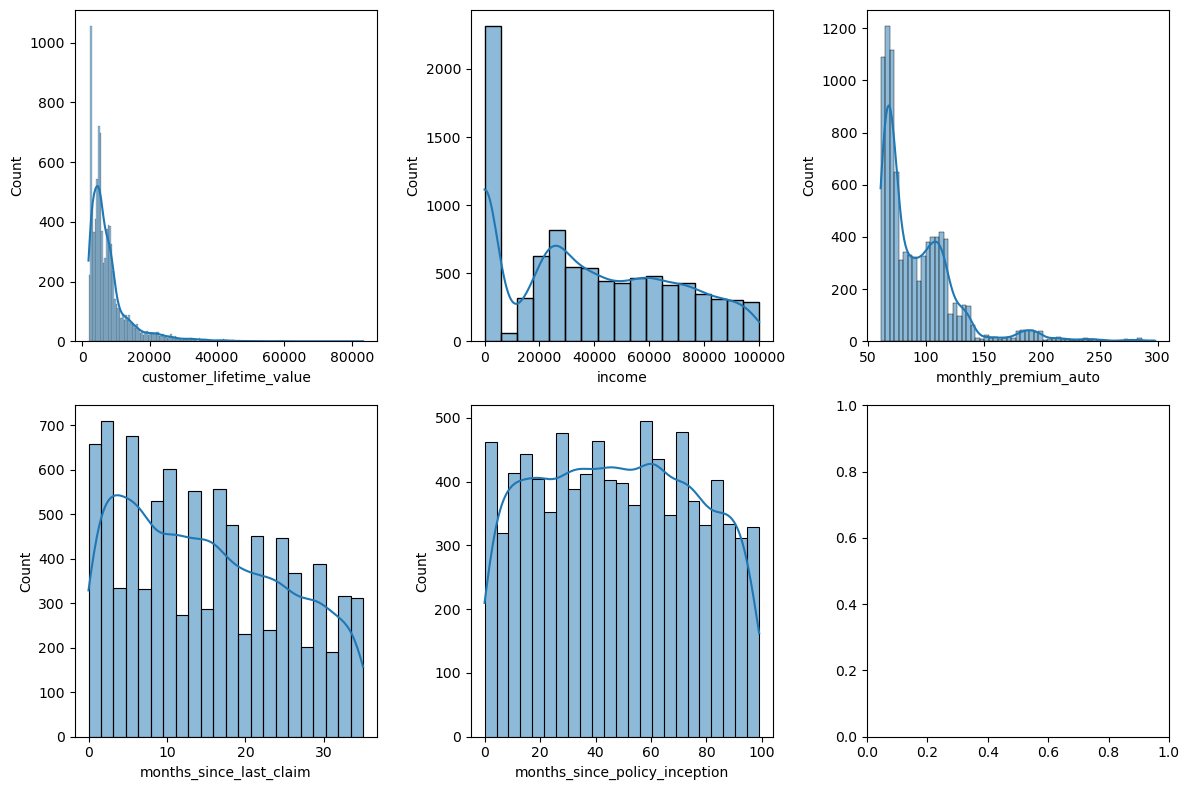

In [99]:
plot_hist(x)

C:\Users\pgarciag\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


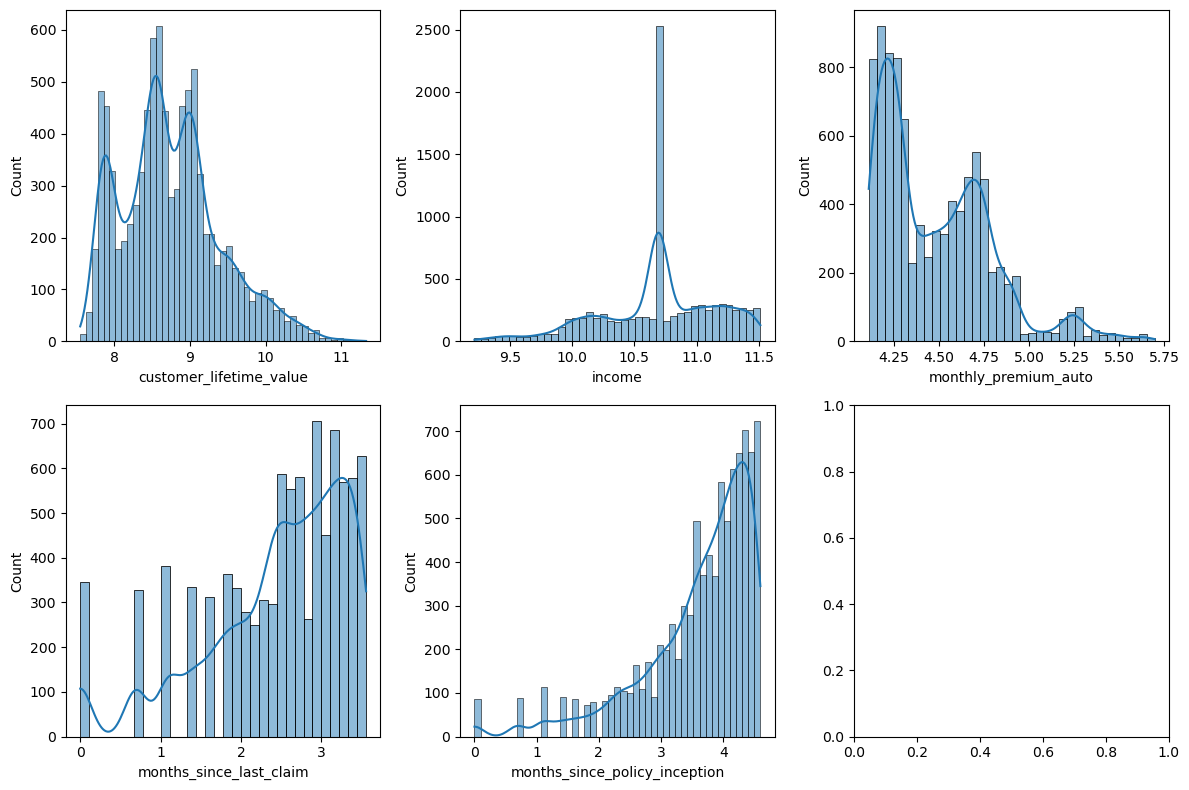

In [100]:
# 04 - Processing Data
    # Use Log transformation to normalise data
x_log = log_transformer(x, COLS_TO_TRANSFORM)
plot_hist(x_log)

In [101]:
x_log.shape

(9134, 5)

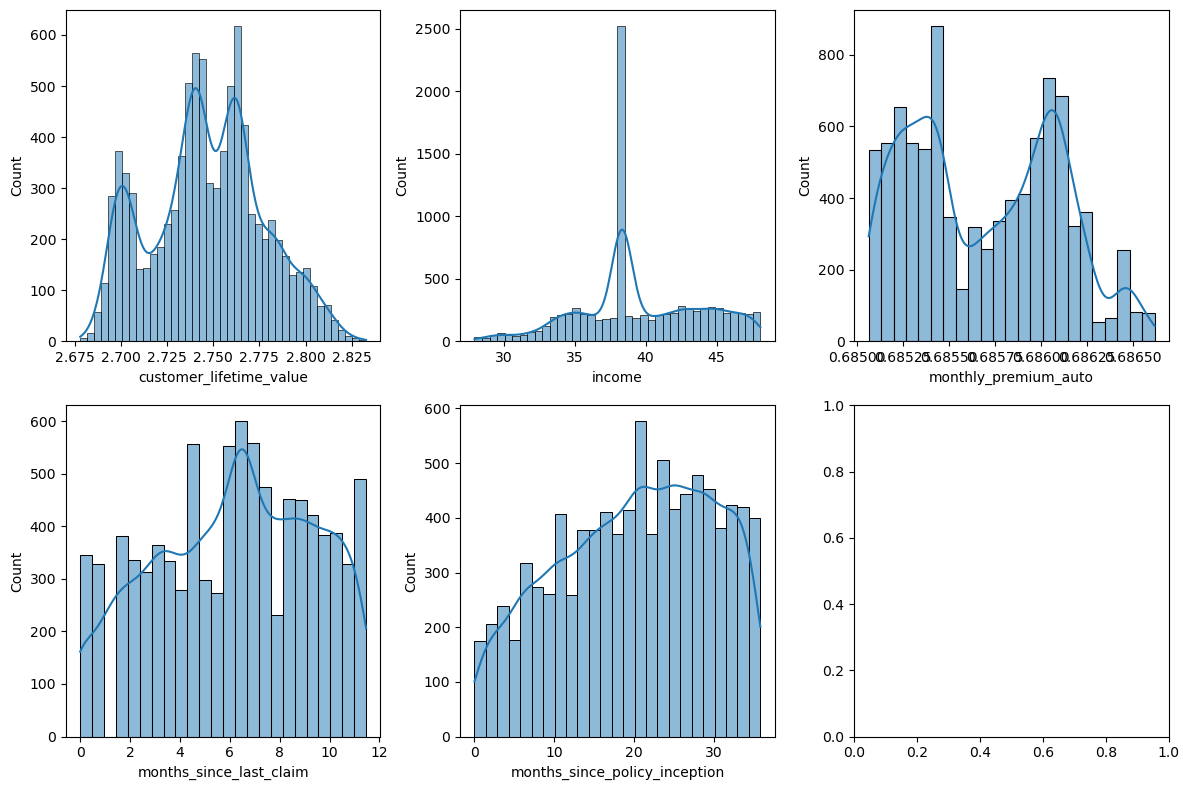

In [102]:
# 04 - Processing Data
    # Use Box-Cox Transformation to normalise data
x_cox = box_cox_transformer(x, COLS_TO_TRANSFORM)
plot_hist(x_cox)

In [103]:
x_cox.shape

(9134, 5)

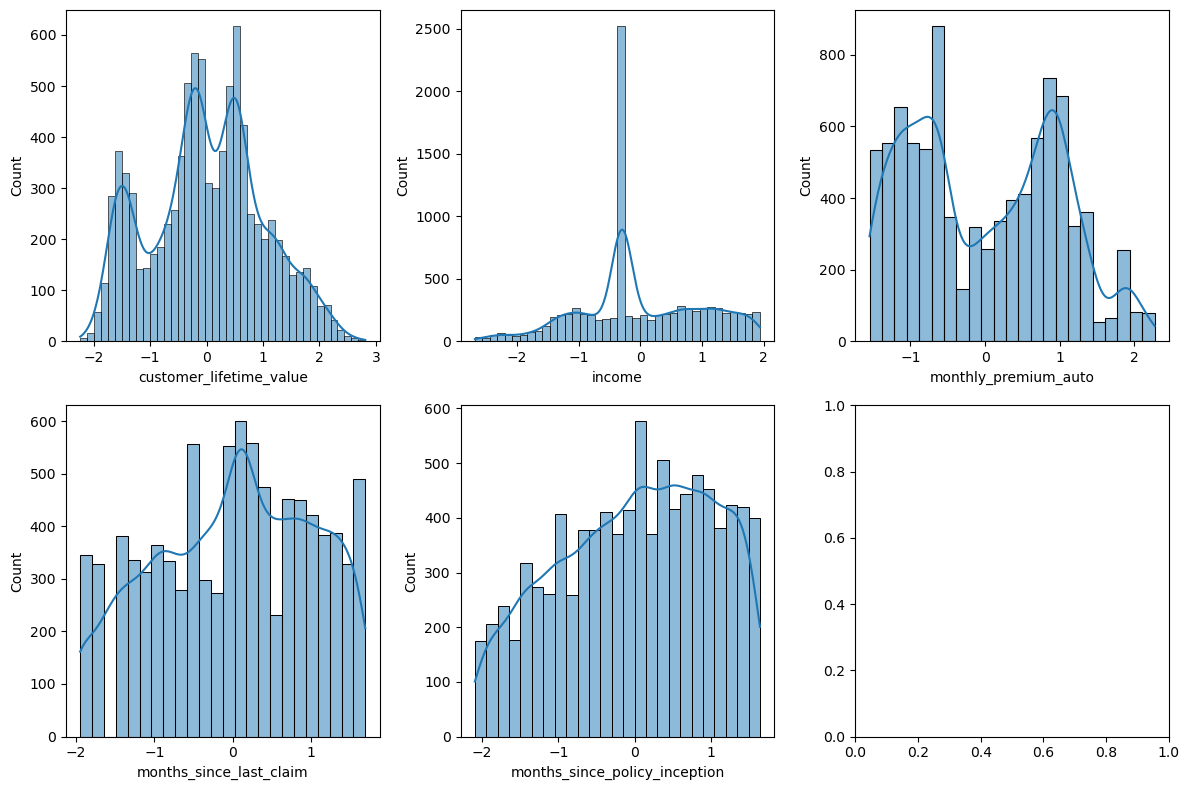

In [104]:
# 04 - Processing Data
    # Standardise data using Standard Scaler:
x_cox_std = standard_scaler(x_cox)
plot_hist(x_cox_std)

In [105]:
x_cox_std.shape

(9134, 5)

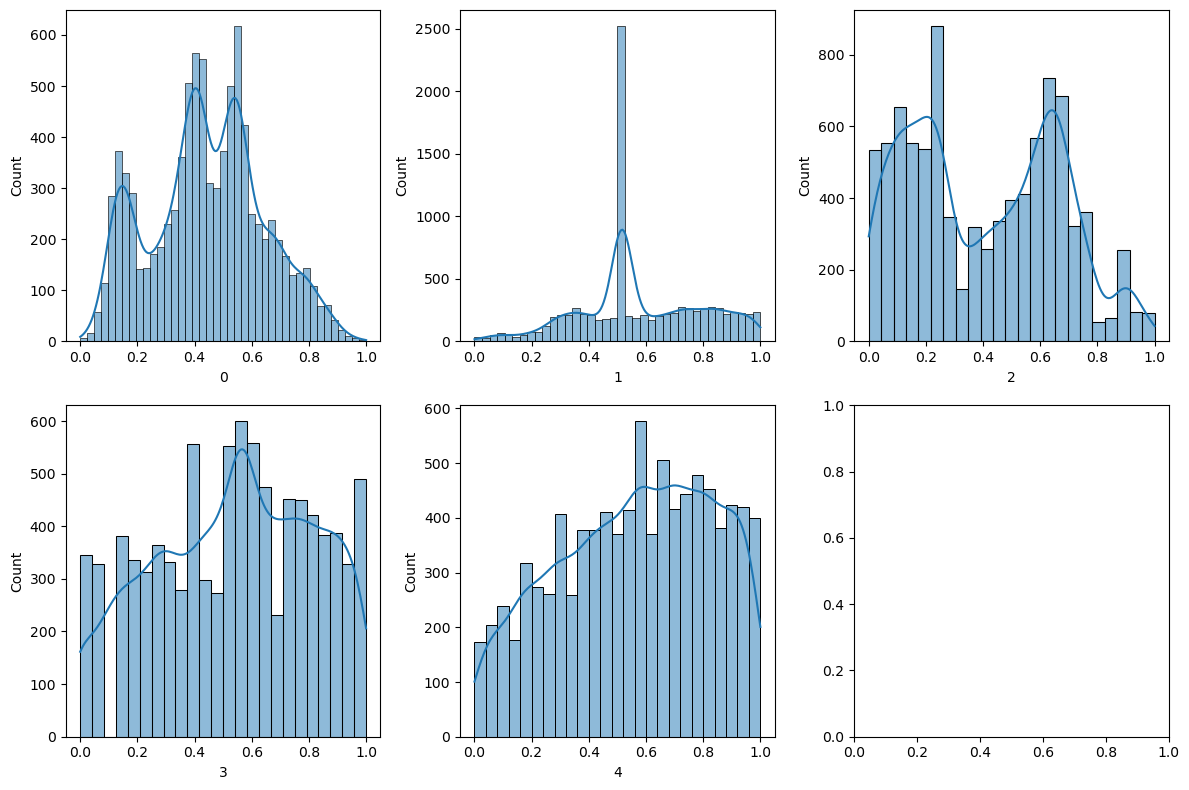

In [106]:
# 04 - Processing Data
    # Standardise data using Min-Max Scaler:
x_cox_minmax = min_max_scaler(x_cox)
plot_hist(x_cox_minmax)

In [107]:
x_cox_minmax.shape

(9134, 5)

# Lab 6

In [108]:
# 04 - Processing Data    
    # Encoding Categorical Data: Label Encoding   
categorical_df_le = label_encoder(categorical_df,LABEL_ENCODER_COLS)
categorical_df_le.head()

,customer,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,1159,0,0,0,1,40,1,1,1,1,0.0,9,0,2,2,0,0,1
1,3815,1,0,0,1,9,4,0,1,2,0.0,1,1,5,3,2,0,1
2,4223,4,0,0,0,32,1,1,1,2,0.0,2,1,5,2,2,3,1
3,8235,3,1,1,1,2,1,1,1,2,0.0,2,0,2,1,1,0,1
6,3100,1,0,0,2,36,1,0,2,1,3.0,4,0,1,1,1,0,1


In [109]:
# 04 - Processing Data    
    # Encoding Categorical Data: One Hot Encoder
categorical_df_one = one_hot_encoder(categorical_df, ONE_HOT_COLS) 
categorical_df_one.shape

(10647, 9252)

In [110]:
#3. Concatenate Data Frames
x_comb = concat_df(x_cox_std, categorical_df_le)
x_comb

,const,0,1,2,3,4,5,6,7,8,...,13,14,15,16,17,18,19,20,21,22
0,1.0,-0.334914,0.218967,-1.546873,-0.819065,0.214078,1159,0,0,0,...,1,1,0.0,9,0,2,2,0,0,1
1,1.0,-1.864614,-0.295792,-1.260678,-1.462015,-0.743570,3815,1,0,0,...,1,2,0.0,1,1,5,3,2,0,1
2,1.0,1.293258,-1.333005,0.628149,1.623408,-0.543420,4223,4,0,0,...,1,2,0.0,2,1,5,2,2,3,1
3,1.0,1.732720,0.265959,0.534556,-0.441404,-1.919838,8235,3,1,1,...,1,2,0.0,2,0,2,1,1,0,1
4,1.0,-0.255895,-0.309653,-1.352362,-0.686531,1.645332,3100,1,0,0,...,2,1,3.0,4,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1.0,-1.388766,0.707770,-0.507518,1.340769,1.156594,6574,0,0,0,...,1,1,4.0,1,1,4,1,1,5,1
9130,1.0,1.576001,-0.295792,1.862420,-0.007926,-0.504540,5709,2,0,0,...,1,2,0.0,2,1,4,0,1,2,1
9131,1.0,-0.181957,0.756361,-1.172446,-0.819065,0.731847,3810,3,0,0,...,2,1,0.0,6,1,5,1,1,0,1
9132,1.0,1.800855,-0.179044,1.945201,-0.326883,0.574219,6790,0,0,1,...,0,1,0.0,2,0,2,0,3,2,1


In [111]:
x_cox_std.shape

(9134, 5)

In [112]:
categorical_df_le.shape

(9134, 18)

In [113]:
x_comb.head()

,const,0,1,2,3,4,5,6,7,8,...,13,14,15,16,17,18,19,20,21,22
0,1.0,-0.334914,0.218967,-1.546873,-0.819065,0.214078,1159,0,0,0,...,1,1,0.0,9,0,2,2,0,0,1
1,1.0,-1.864614,-0.295792,-1.260678,-1.462015,-0.743570,3815,1,0,0,...,1,2,0.0,1,1,5,3,2,0,1
2,1.0,1.293258,-1.333005,0.628149,1.623408,-0.543420,4223,4,0,0,...,1,2,0.0,2,1,5,2,2,3,1
3,1.0,1.732720,0.265959,0.534556,-0.441404,-1.919838,8235,3,1,1,...,1,2,0.0,2,0,2,1,1,0,1
4,1.0,-0.255895,-0.309653,-1.352362,-0.686531,1.645332,3100,1,0,0,...,2,1,3.0,4,0,1,1,1,0,1


In [114]:
x_comb[[15,16]] = x_comb[[15,16]].astype(float)

In [117]:
x_comb.shape

(9134, 24)

In [126]:
y = y.values.reshape(-1,1)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(x_comb, y, test_size=0.4, random_state=100)

In [134]:
X_train.shape

(5480, 24)

In [135]:
#Linear Regression
model_all = linear_regression(x_comb, y)
model = linear_regression(X_train, y_train)

In [137]:
model_metrics(x_comb, y, model_all)

R2 Score: 0.507 
Mean Squared Error: 41618.995 
Root MSE: 204.007 
Mean Absolute Error: 145.485


In [138]:
model_metrics(X_test, y_test, model)

R2 Score: 0.490 
Mean Squared Error: 40658.857 
Root MSE: 201.640 
Mean Absolute Error: 146.126
